<a href="https://colab.research.google.com/github/FekadeTafess/Health-Data-Analysis-Healthy-Minds-Survey-Data-/blob/main/HMS_Survey_Data_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

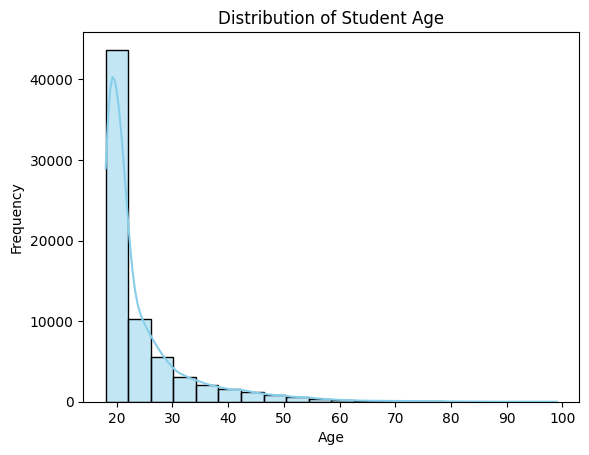

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('final_research_dataset.csv')

# Distribution of Age (Histogram)
plt.clf()
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Student Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')

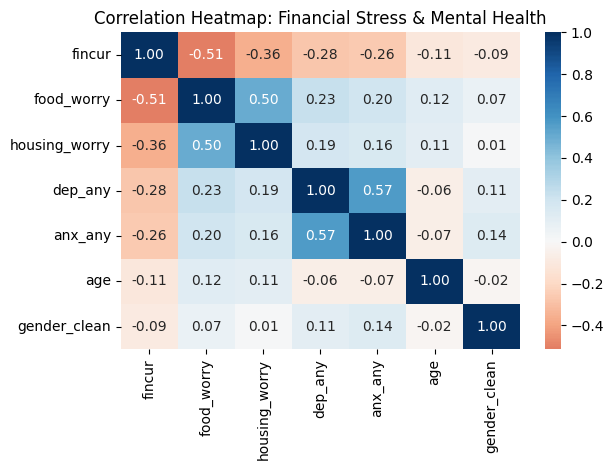

In [5]:
# Correlation Heatmap
plt.clf()
cols_for_corr = ['fincur', 'food_worry', 'housing_worry', 'dep_any', 'anx_any', 'age', 'gender_clean']
corr_matrix = df[cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Correlation Heatmap: Financial Stress & Mental Health')
plt.tight_layout()
plt.savefig('eda_correlation_heatmap.png')


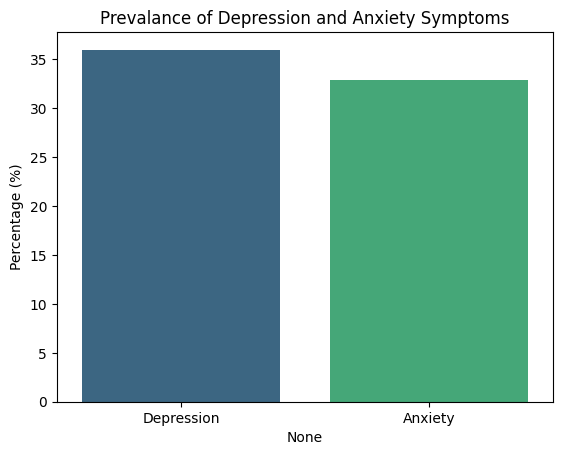

In [6]:
# Depression & Anxiety Prevalence (Distributions)
plt.clf()
prevalence = df[['dep_any', 'anx_any']].mean() * 100
sns.barplot(x=prevalence.index, y=prevalence.values, hue=prevalence.index, palette='viridis', legend=False)
plt.title('Prevalance of Depression and Anxiety Symptoms')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Depression', 'Anxiety'])
plt.savefig('prevalence_bar.png')

<Figure size 640x480 with 0 Axes>

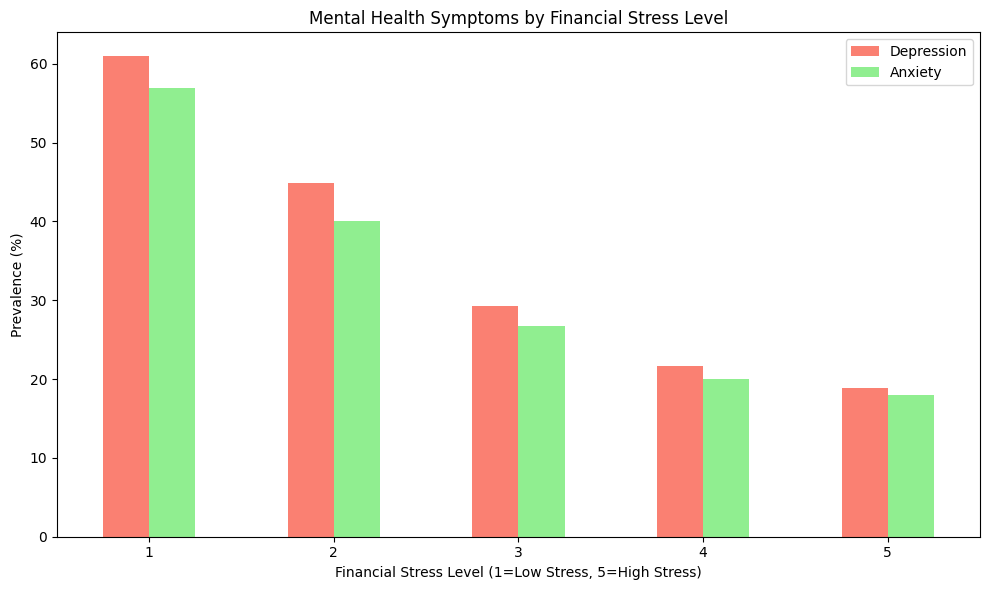

In [7]:
# The "Risk Gradient" (Relationhip Analysis)
# How depression/anxiety rates change across financial stress (fincur)
plt.clf()

# Grouping by fincur and calculating mean of dep_any and anx_any
risk_data = df.groupby('fincur')[['dep_any', 'anx_any']].mean() * 100
risk_data.plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightgreen'])
plt.title('Mental Health Symptoms by Financial Stress Level')
plt.xlabel('Financial Stress Level (1=Low Stress, 5=High Stress)')
plt.ylabel('Prevalence (%)')
plt.legend(['Depression', 'Anxiety'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('risk_gradient_plot.png')

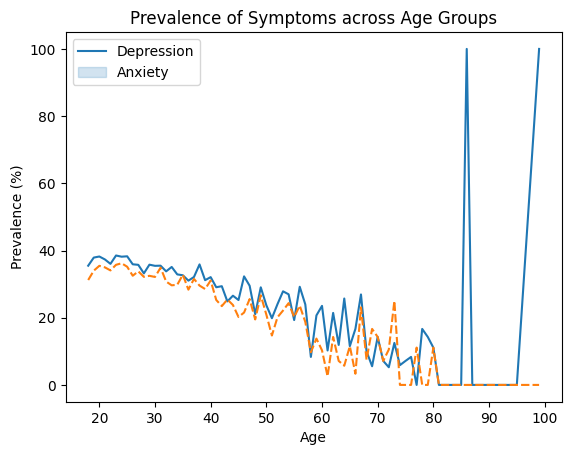

In [8]:
# Since it's cross-sectional, we don't have "time" trends,
# but we can look at "Age Trends" as a proxy for developmental time.
plt.clf()
age_trend = df.groupby('age')[['dep_any', 'anx_any']].mean() * 100
sns.lineplot(data=age_trend)
plt.title('Prevalence of Symptoms across Age Groups')
plt.xlabel('Age')
plt.ylabel('Prevalence (%)')
plt.legend(['Depression', 'Anxiety'])
plt.savefig('age_trend_lineplot.png')